In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from string import letters
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### In the Project_EDA.ipynb I converted the Numeric data to its nominal labels using the FARS User guide,
 I examined the data and now I will convert the data back to numeric/semi-numeric form with some changes so I can perform ML operations on it

In [2]:
df = pd.read_csv("project_EDA.csv")

In [3]:
df.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
0,Alabama,10001,1,1,January,Rural,68.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,Unknown,Reported Negative,Not Tested for Drugs,Not Tested for Drugs,Died at Scene,1,January,No,Non-Hispanic,White
1,Alabama,10002,1,1,January,Rural,49.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,No,Other Drugs,Other Drugs,Other Drugs,Died at Scene,1,January,No,Non-Hispanic,White
2,Alabama,10003,1,1,January,Rural,31.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,Unknown,Reported Negative,Not Tested for Drugs,Not Tested for Drugs,Died at Scene,1,January,No,Non-Hispanic,Black
3,Alabama,10003,2,1,January,Rural,20.0,Female,Passenger of a Motor Vehicle In-Transport,Injured,...,Not Reported,Not Tested for Drugs,Not Tested for Drugs,Not Tested for Drugs,Not Applicable,NA - Non Fatal,NA - Non Fatal,Not Applicable,Not A Fatality,Not A Fatality
4,Alabama,10004,1,4,January,Rural,40.0,Male,Driver of a Motor Vehicle In-Transport,Fatal Injury,...,Unknown,Reported Negative,Not Tested for Drugs,Not Tested for Drugs,Died at Scene,4,January,No,Non-Hispanic,White


In [4]:
X = df

In [5]:
X.columns

Index([u'STATE', u'ST_CASE', u'PER_NO', u'DAY', u'MONTH', u'RUR_URB', u'AGE',
       u'SEX', u'PER_TYP', u'INJ_SEV', u'DRINKING', u'ALC_DET', u'ALC_STATUS',
       u'ATST_TYP', u'ALC_RES', u'DRUGS', u'DRUGRES1', u'DRUGRES2',
       u'DRUGRES3', u'DOA', u'DEATH_DA', u'DEATH_MO', u'WORK_INJ', u'HISPANIC',
       u'RACE'],
      dtype='object')

Converting data into numeric form

In [6]:
replacements = {
    'RUR_URB': {'Rural':1, 'Urban':2, 'Trafficway Not in State Inventory':6, 'Not Reported':8},
    'SEX': {'Male':1, 'Female':2}
    }
X.replace(replacements, regex=True, inplace=True)

2    37590
1    37111
8     5621
6      265
Name: RUR_URB, dtype: int64

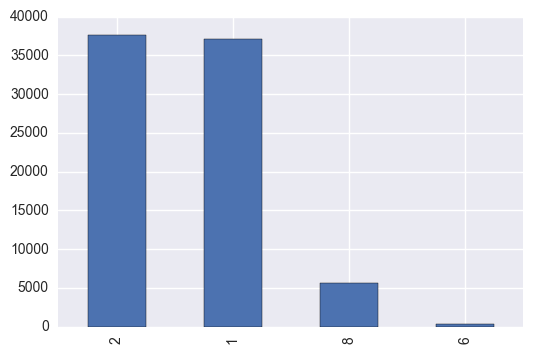

In [7]:
X.RUR_URB.value_counts().plot(kind='bar')
X.RUR_URB.value_counts()

22.00     2051
21.00     2029
23.00     1994
19.00     1939
20.00     1931
18.00     1899
24.00     1893
25.00     1820
26.00     1676
39.27     1668
27.00     1613
17.00     1530
29.00     1495
28.00     1374
31.00     1366
30.00     1340
32.00     1298
35.00     1256
33.00     1232
51.00     1231
34.00     1228
37.00     1184
53.00     1175
54.00     1172
55.00     1155
50.00     1147
52.00     1128
36.00     1126
44.00     1120
38.00     1102
          ... 
76.00      376
4.00       374
11.00      369
7.00       361
77.00      330
78.00      323
80.00      313
79.00      294
82.00      274
83.00      262
81.00      261
84.00      249
85.00      237
86.00      202
87.00      187
88.00      168
89.00      138
90.00      109
91.00       87
92.00       67
93.00       51
94.00       45
95.00       27
96.00       16
97.00       12
98.00        6
114.00       3
99.00        2
103.00       1
101.00       1
Name: AGE, dtype: int64

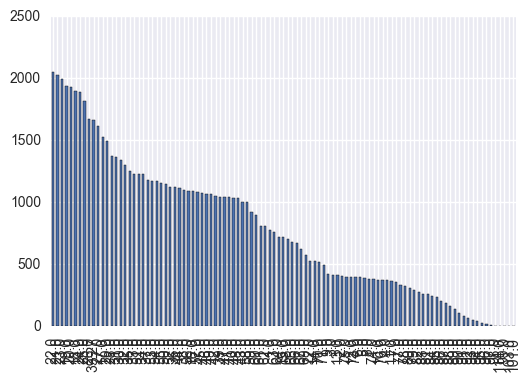

In [8]:
X.AGE.value_counts().plot(kind='bar')
X.AGE.value_counts()

1    53956
2    26631
Name: SEX, dtype: int64

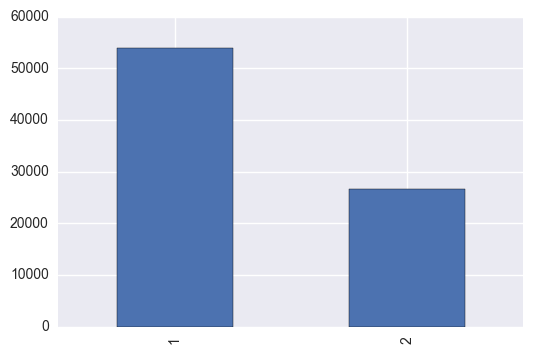

In [9]:
X.SEX.value_counts().plot(kind='bar')
X.SEX.value_counts()

In [10]:
replacements = {
    'PER_TYP': {'Driver of a Motor Vehicle In-Transport':1, 'Passenger of a Motor Vehicle In-Transport':2,               
                'Pedestrian':5, 'Others':7}, 
    'INJ_SEV': {'No Apparent Injury':0, 'Possible Injury':1, 'Suspected Minor Injury':2, 'Suspected Serious Injury':3,
                'Fatal Injury':4, 'Injured':5},
    'DRINKING': {'No':0, 'Yes':1, 'Not Reported|UnKnown':8},
    'ALC_STATUS': {'Test Not Given':0, 'Test Given':2}
    }
X.replace(replacements, regex=True, inplace=True)

1    48613
2    24646
5     5795
7     1533
Name: PER_TYP, dtype: int64

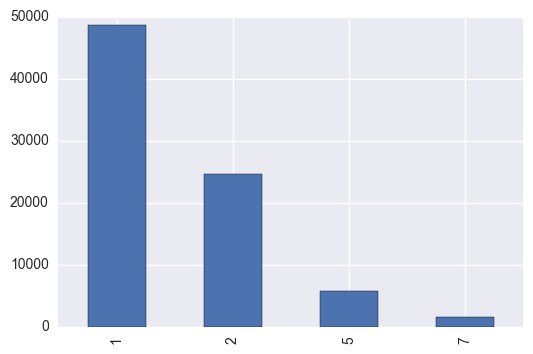

In [11]:
X.PER_TYP.value_counts().plot(kind='bar')
X.PER_TYP.value_counts()

4    35094
0    19704
5    17465
3     8324
Name: INJ_SEV, dtype: int64

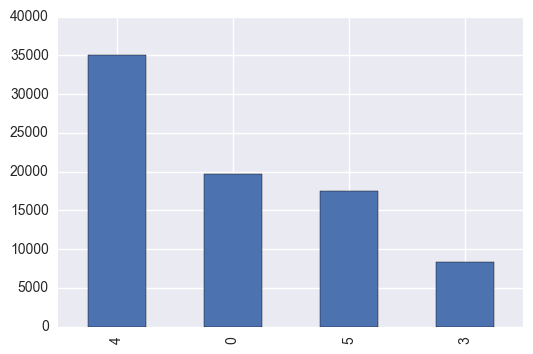

In [12]:
X.INJ_SEV.value_counts().plot(kind='bar')
X.INJ_SEV.value_counts()

8    39259
0    33577
1     7751
Name: DRINKING, dtype: int64

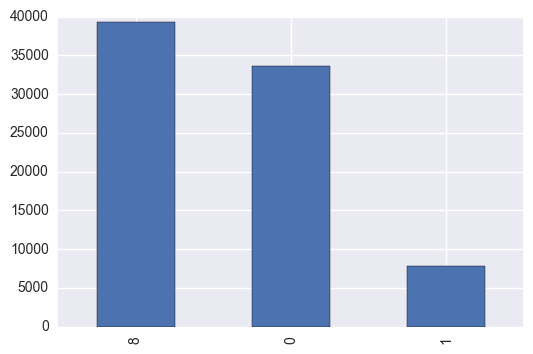

In [13]:
X.DRINKING.value_counts().plot(kind='bar')
X.DRINKING.value_counts()

0    50372
2    30215
Name: ALC_STATUS, dtype: int64

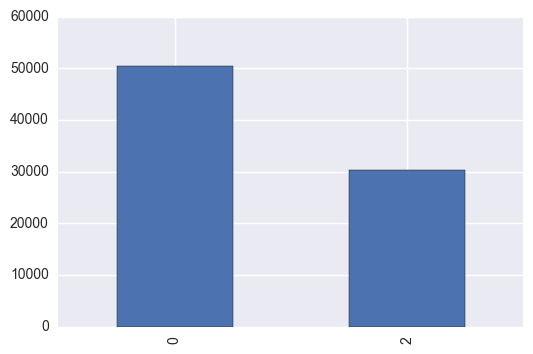

In [14]:
X.ALC_STATUS.value_counts().plot(kind='bar')
X.ALC_STATUS.value_counts()

None Given             51230
0.0                    21073
Legally intoxicated     8284
Name: ALC_RES, dtype: int64

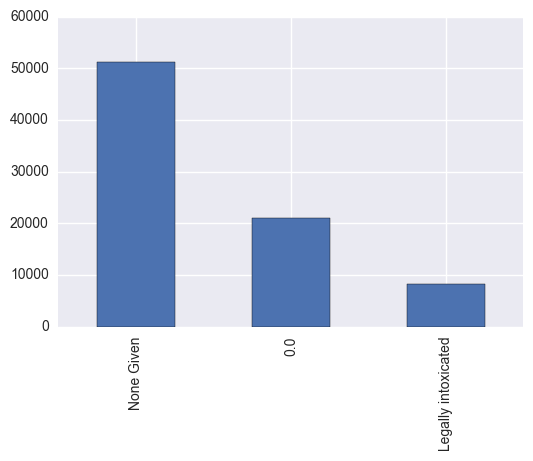

In [15]:
X.ALC_RES.value_counts().plot(kind='bar')
X.ALC_RES.value_counts()

996    51230
0.0    21073
0.8     8284
Name: ALC_RES, dtype: int64

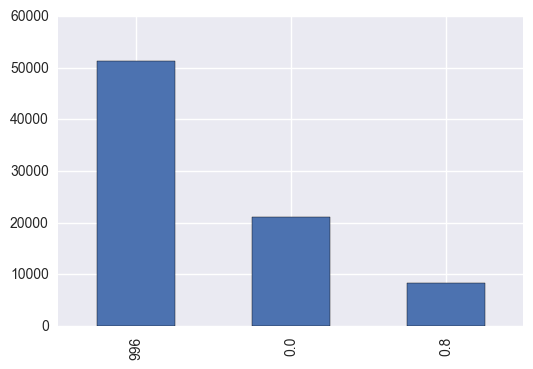

In [16]:
for i in range(80587):
    if X.ALC_RES[i] == "Legally intoxicated":
        X.loc[i, 'ALC_RES'] = 0.8
    elif X.ALC_RES[i] == "None Given":
        X.loc[i, 'ALC_RES'] = 996
X.ALC_RES.value_counts().plot(kind='bar')
X.ALC_RES.value_counts()

In [17]:
replacements = {
    'DRUGTST1': {'Not Reported|Unknown if Tested|Unknown Test Type':'Test Not Given'}, 
    'DRUGTST2': {'Not Reported|Unknown if Tested|Unknown Test Type':'Test Not Given'}, 
    'DRUGTST3': {'Not Reported|Unknown if Tested|Unknown Test Type':'Test Not Given'} 
    }
X.replace(replacements, regex=True, inplace=True)

In [18]:
replacements = {
    'DRUGS': {'No':0, 'Yes':1, 'Not Reported':8, 'Unknown':9}
    }
X.replace(replacements, regex=True, inplace=True)

Not Tested for Drugs    50019
Reported Negative       13297
Not Reported             8185
Other Drugs              6235
Cannabinoid              2851
Name: DRUGRES1, dtype: int64

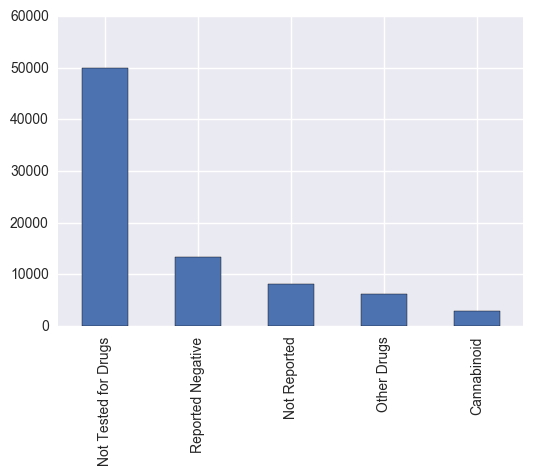

In [19]:
X.DRUGRES1.value_counts().plot(kind='bar')
X.DRUGRES1.value_counts()

0      50019
1      13297
95      8185
996     6235
695     2851
Name: DRUGRES1, dtype: int64

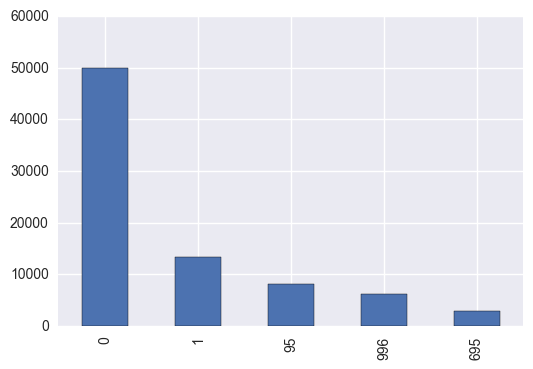

In [20]:
for i in range(80587):
    if X.DRUGRES1[i] == "Not Tested for Drugs":
        X.loc[i, 'DRUGRES1'] = 0
    elif X.DRUGRES1[i] == "Reported Negative":
        X.loc[i, 'DRUGRES1'] = 1
    elif X.DRUGRES1[i] == "Not Reported":
        X.loc[i, 'DRUGRES1'] = 95
    elif X.DRUGRES1[i] == "Cannabinoid":
        X.loc[i, 'DRUGRES1'] = 695
    elif X.DRUGRES1[i] == "Other Drugs":
        X.loc[i, 'DRUGRES1'] = 996
X.DRUGRES1.value_counts().plot(kind='bar')
X.DRUGRES1.value_counts() 
   

0      76095
996     3324
695     1160
1          7
95         1
Name: DRUGRES2, dtype: int64

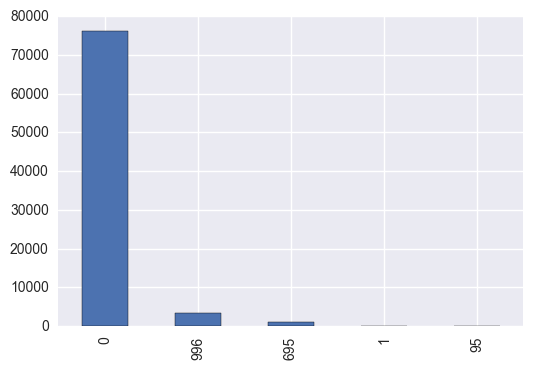

In [21]:
for i in range(80587):
    if X.DRUGRES2[i] == "Not Tested for Drugs":
        X.loc[i, 'DRUGRES2'] = 0
    elif X.DRUGRES2[i] == "Reported Negative":
        X.loc[i, 'DRUGRES2'] = 1
    elif X.DRUGRES2[i] == "Not Reported":
        X.loc[i, 'DRUGRES2'] = 95
    elif X.DRUGRES2[i] == "Cannabinoid":
        X.loc[i, 'DRUGRES2'] = 695
    elif X.DRUGRES2[i] == "Other Drugs":
        X.loc[i, 'DRUGRES2'] = 996
X.DRUGRES2.value_counts().plot(kind='bar')
X.DRUGRES2.value_counts() 

0      78531
996     1542
695      502
1         12
Name: DRUGRES3, dtype: int64

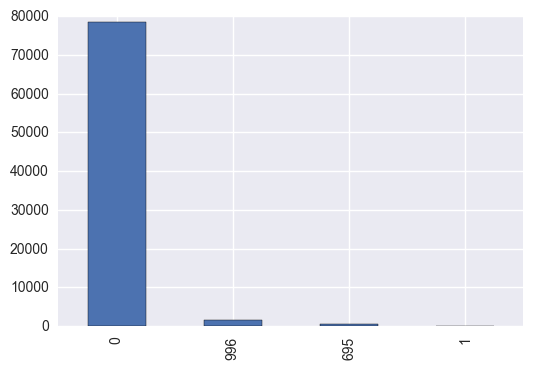

In [22]:
for i in range(80587):
    if X.DRUGRES3[i] == "Not Tested for Drugs":
        X.loc[i, 'DRUGRES3'] = 0
    elif X.DRUGRES3[i] == "Reported Negative":
        X.loc[i, 'DRUGRES3'] = 1
    elif X.DRUGRES3[i] == "Not Reported":
        X.loc[i, 'DRUGRES3'] = 95
    elif X.DRUGRES3[i] == "Cannabinoid":
        X.loc[i, 'DRUGRES3'] = 695
    elif X.DRUGRES3[i] == "Other Drugs":
        X.loc[i, 'DRUGRES3'] = 996
X.DRUGRES3.value_counts().plot(kind='bar')
X.DRUGRES3.value_counts() 

In [23]:
replacements = {
    'DOA': {'Not Applicable':0, 'Died at Scene':7, 'Died En Route':8}, 
    'DEATH_MO': {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9,
                 'October':10, 'November':11, 'December':12, 'NA - Non Fatal':88},
    'DEATH_DA': {'NA - Non Fatal':88},
    'WORK_INJ': {'No':0, 'Yes':1, 'Not Applicable':8},
    'RACE': {'Not A Fatality':0, 'White':1, 'Black':2,'All Other Races':98, 'Asian':8}
    }
X.replace(replacements, regex=True, inplace=True)

In [24]:
X.RACE.value_counts()

0     45495
1     24100
98     5675
2      4718
8       599
Name: RACE, dtype: int64

0    60212
7    20003
8      372
Name: DOA, dtype: int64

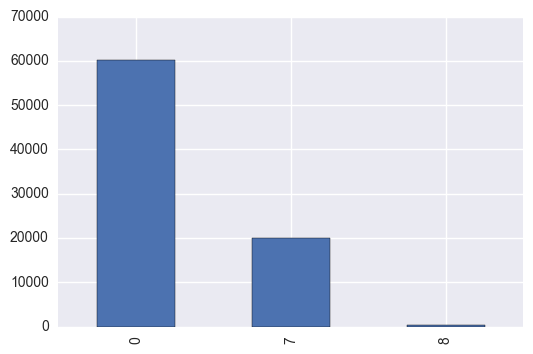

In [25]:
X.DOA.value_counts().plot(kind='bar')
X.DOA.value_counts()

88    45796
8      3312
10     3231
7      3220
9      3090
5      3077
12     3052
6      2972
11     2938
4      2632
3      2575
1      2546
2      2146
Name: DEATH_MO, dtype: int64

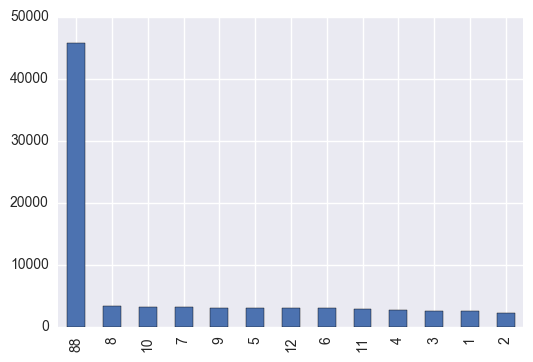

In [26]:
X.DEATH_MO.value_counts().plot(kind='bar')
X.DEATH_MO.value_counts()

88    45813
3      1214
4      1202
12     1190
6      1187
7      1186
5      1179
26     1175
14     1172
11     1171
17     1160
18     1158
25     1149
24     1148
21     1145
19     1144
10     1139
15     1136
1      1135
22     1131
16     1126
27     1124
13     1123
20     1122
2      1107
23     1102
9      1102
8      1097
28     1057
30     1032
29      965
31      696
Name: DEATH_DA, dtype: int64

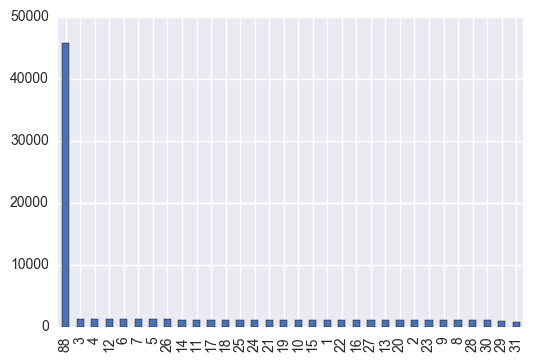

In [27]:
X.DEATH_DA.value_counts().plot(kind='bar')
X.DEATH_DA.value_counts()

8    49946
0    29811
1      830
Name: WORK_INJ, dtype: int64

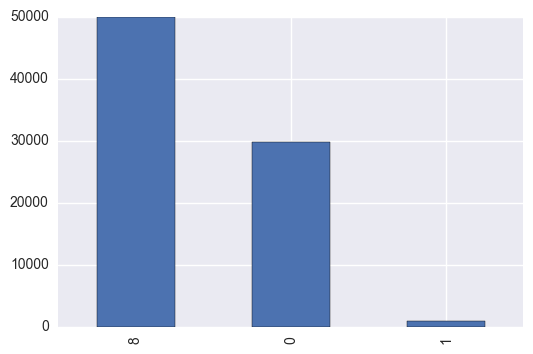

In [28]:
X.WORK_INJ.value_counts().plot(kind='bar')
X.WORK_INJ.value_counts()

0     45495
1     24100
98     5675
2      4718
8       599
Name: RACE, dtype: int64

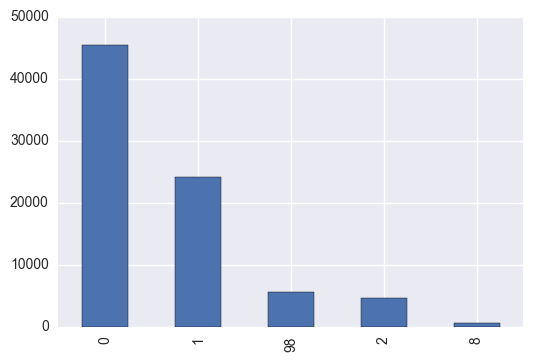

In [29]:
X.RACE.value_counts().plot(kind='bar')
X.RACE.value_counts()

0     45495
7     25089
99     5884
1      2018
6      1263
2       287
3       206
4       190
5       155
Name: HISPANIC, dtype: int64

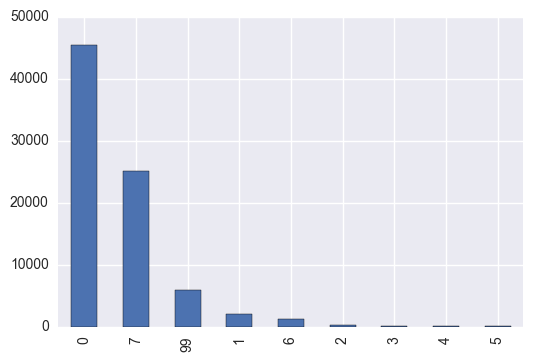

In [30]:
replacements = {
    'HISPANIC': {'Not A Fatality':0, 'Mexican':1, 'Puerto Rican':2, 'Cuban':3, 'Central or South American':4,
                 'European Spanish':5, 'Hispanic, Origin Not Specified or Other Origin':6, 'Non-Hispanic':7, 'Unknown':99}, 
    
    }
X.replace(replacements, regex=True, inplace=True)
X.HISPANIC.value_counts().plot(kind='bar')
X.HISPANIC.value_counts()

In [31]:
X.head()

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
0,Alabama,10001,1,1,January,1,68.0,1,1,4,...,9,1,0,0,7,1,1,0,7,1
1,Alabama,10002,1,1,January,1,49.0,1,1,4,...,0,996,996,996,7,1,1,0,7,1
2,Alabama,10003,1,1,January,1,31.0,1,1,4,...,9,1,0,0,7,1,1,0,7,2
3,Alabama,10003,2,1,January,1,20.0,2,2,5,...,8,0,0,0,0,88,88,8,0,0
4,Alabama,10004,1,4,January,1,40.0,1,1,4,...,9,1,0,0,7,4,1,0,7,1


In [32]:
# For a person involved in a fatal crash with driving above the legal limit of alcohol or having consumed alcohol
# and being tested positive for using cannibnoid
X['both'] = 0
for i in range(80587):
    if ((X.DRINKING[i]==1)|(X.ALC_RES[i] == 0.8)):
        if ((X.INJ_SEV[i] == 4)|(X.DOA[i] == 7)):
            if ((X.DRUGRES1[i] == 695)|(X.DRUGRES2[i] == 695)|(X.DRUGRES3[i] == 695)):
                X.loc[i, 'both'] = 1
    else:
        X.loc[i, 'both'] = 0


In [33]:
X

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
0,Alabama,10001,1,1,January,1,68.00,1,1,4,...,1,0,0,7,1,1,0,7,1,0
1,Alabama,10002,1,1,January,1,49.00,1,1,4,...,996,996,996,7,1,1,0,7,1,0
2,Alabama,10003,1,1,January,1,31.00,1,1,4,...,1,0,0,7,1,1,0,7,2,0
3,Alabama,10003,2,1,January,1,20.00,2,2,5,...,0,0,0,0,88,88,8,0,0,0
4,Alabama,10004,1,4,January,1,40.00,1,1,4,...,1,0,0,7,4,1,0,7,1,0
5,Alabama,10005,1,7,January,2,24.00,1,1,4,...,1,0,0,7,7,1,0,7,1,0
6,Alabama,10005,1,7,January,2,60.00,1,1,0,...,1,0,0,0,88,88,8,0,0,0
7,Alabama,10006,1,8,January,1,64.00,1,1,4,...,0,0,0,0,8,1,0,7,1,0
8,Alabama,10006,2,8,January,1,17.00,1,2,0,...,0,0,0,0,88,88,8,0,0,0
9,Alabama,10007,1,8,January,2,80.00,1,1,4,...,0,0,0,0,8,1,0,7,1,0


In [34]:
#These are the cases where fatal crashes where the participant tests positive for marijuana the same as crashes
#where the participant tests positive for alcohol
X[X['both']==1]

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
44,Alabama,10025,1,15,January,1,26.0,1,1,4,...,695,0,0,7,15,1,0,7,1,1
123,Alabama,10059,1,10,February,1,31.0,1,5,4,...,996,996,695,0,10,2,0,7,1,1
143,Alabama,10066,1,8,February,2,22.0,2,1,4,...,996,996,695,7,8,2,0,7,2,1
187,Alabama,10083,1,1,March,1,40.0,1,1,4,...,695,0,0,7,1,3,0,7,2,1
188,Alabama,10083,1,1,March,1,31.0,2,1,4,...,695,0,0,7,1,3,0,7,2,1
243,Alabama,10103,2,28,February,1,25.0,1,2,4,...,695,695,0,7,28,2,0,7,1,1
374,Alabama,10149,1,3,April,1,59.0,1,1,4,...,695,695,0,7,3,4,0,7,2,1
412,Alabama,10167,1,11,April,1,23.0,1,1,4,...,996,996,695,7,11,4,0,7,1,1
550,Alabama,10217,1,4,May,1,21.0,2,1,4,...,695,695,695,7,4,5,0,7,1,1
742,Alabama,10296,1,9,June,1,51.0,2,1,4,...,695,0,0,7,9,6,0,7,1,1


### I will split this data into training and test sets then I will perform ML scheme to test the data and predict if I the output

Since this data is large but the required output column has far less positive occurances i will perform a 25% train test split

In [35]:
train = pd.DataFrame()
train = X.sample(frac=0.75, random_state=1)

In [36]:
test = pd.DataFrame()
test = X.loc[~X.index.isin(train.index)]
test1 = X.loc[~X.index.isin(train.index)]

In [37]:
test = test.drop(['both'], axis=1)

In [38]:
train.to_csv('Project_train.csv', index=False)

In [39]:
test.to_csv('Project_test.csv', index=False)

In [40]:
test1.to_csv('Project_test_OP.csv', index=False)

In [41]:
X.to_csv('project_OP.csv', index=False)

In [42]:
test

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGS,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE
4,Alabama,10004,1,4,January,1,40.00,1,1,4,...,9,1,0,0,7,4,1,0,7,1
6,Alabama,10005,1,7,January,2,60.00,1,1,0,...,0,1,0,0,0,88,88,8,0,0
7,Alabama,10006,1,8,January,1,64.00,1,1,4,...,0,0,0,0,0,8,1,0,7,1
9,Alabama,10007,1,8,January,2,80.00,1,1,4,...,8,0,0,0,0,8,1,0,7,1
15,Alabama,10010,1,5,January,1,64.00,1,1,3,...,0,0,0,0,0,88,88,8,0,0
16,Alabama,10011,1,7,January,2,17.00,1,1,0,...,0,1,0,0,0,88,88,8,0,0
17,Alabama,10011,1,7,January,2,42.00,2,1,4,...,0,1,0,0,7,7,1,0,7,1
18,Alabama,10012,1,9,January,2,23.00,2,1,5,...,9,1,0,0,0,88,88,8,0,0
27,Alabama,10016,1,13,January,2,60.00,1,1,0,...,0,0,0,0,0,88,88,8,0,0
41,Alabama,10022,2,26,January,1,66.00,1,2,3,...,8,0,0,0,0,88,88,8,0,0


In [43]:
train

,STATE,ST_CASE,PER_NO,DAY,MONTH,RUR_URB,AGE,SEX,PER_TYP,INJ_SEV,...,DRUGRES1,DRUGRES2,DRUGRES3,DOA,DEATH_DA,DEATH_MO,WORK_INJ,HISPANIC,RACE,both
7025,California,60672,1,3,April,1,63.00,2,1,0,...,0,0,0,0,88,88,8,0,0,0
41622,Mississippi,280469,3,24,October,1,16.00,1,2,5,...,0,0,0,0,88,88,8,0,0,0
72723,Texas,482422,1,6,October,1,60.00,1,1,0,...,0,0,0,0,88,88,8,0,0,0
36667,Massachusetts,250047,1,3,May,2,43.00,1,1,4,...,996,996,0,7,3,5,0,7,1,0
75843,Virginia,510133,1,3,April,1,26.00,2,1,4,...,1,0,0,0,3,4,0,7,1,0
14787,Connecticut,90230,2,11,October,2,21.00,2,2,5,...,0,0,0,0,88,88,8,0,0,0
11997,California,62564,2,7,December,1,3.00,2,2,0,...,0,0,0,0,88,88,8,0,0,0
76301,Virginia,510339,1,18,July,2,43.00,1,1,4,...,1,0,0,0,18,7,0,7,2,0
1040,Alabama,10419,2,7,August,2,51.00,1,2,4,...,0,0,0,7,7,8,0,7,2,0
8562,California,61263,1,26,June,2,21.00,1,1,0,...,95,0,0,0,88,88,8,0,0,0


## Continuing in the Project_RFC.ipynb